In [83]:
### All python libraries imported

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,classification_report
from sklearn.metrics import mean_absolute_error

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import kerastuner as kt
from keras.layers import Dense, Dropout
from keras.models import Sequential


In [5]:
df = pd.read_csv('Brain Tumor.csv')

### Data Analysis and Preprocessing
First Order Features

Mean : Gives the contribution of individual pixel intensity for the entire image

Variance : Used to find how each pixel varies from the neighbouring pixel

Standard Deviation : measures the deviation of measured Values or the data from its mean.

Skewness : measures of symmetry, or more precisely, the lack of symmetry.

Kurtosis : describes the peakedness of e.g. a frequency distribution

Second Order Features

Contrast : the difference in luminance or colour across the image

Energy : It's the rate of change in the color/brightness/magnitude of the pixels over local areas.

ASM (Angular second moment) : is a measure of textural Uniformity of an image

Entropy : is a statistical measure of randomness that can be used to characterize the texture of the image

Homogeneity : homogeneity expresses how similar certain elements (pixels) of the image are.

Dissimilarity : is a numerical measure of how different two data objects are.

Correlation : Correlation is the process of moving a filter mask often referred to as kernel over the image and computing the sum of products at each location(CNN alike)

Coarseness : Describes the roughness/harshness of a texture

Labels

Class : 1 = Tumor

0 = Not Tumor

In [3]:
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [4]:
df.columns

Index(['Image', 'Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness'],
      dtype='object')

In [5]:
df.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


In [6]:
df.shape

(3762, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [8]:
###  To find the missing values in every feature
df.isnull().sum()

Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

In [3]:
s = df['Class']
s.value_counts()

0    2079
1    1683
Name: Class, dtype: int64

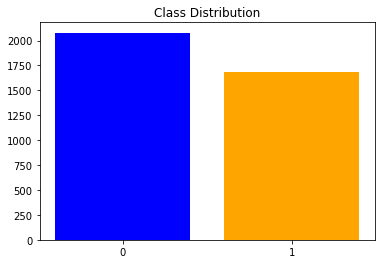

In [4]:
### Histogram frequency distribution for Class attribute

plt.bar(["0","1"],df['Class'].value_counts(),color = ['blue','orange'])
plt.title("Class Distribution")
plt.show()

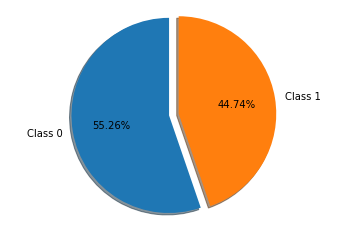

In [5]:
### Pie Chart for Class attribute

labels = 'Class 0' , 'Class 1'
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(s.value_counts(), explode = explode ,labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

In [6]:
### Dropping Image attribute
df.drop('Image',axis=1,inplace=True)

In [12]:
### Correlation Matrix

corr_m = df.corr()
corr_m.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)


,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
Class,1.00,-0.10,0.31,0.29,-0.78,0.40,0.24,0.21,-0.86,-0.76,-0.85,0.56,-0.11,nan
Mean,-0.10,1.00,0.78,0.79,-0.10,-0.60,-0.36,-0.05,-0.01,-0.11,0.10,-0.11,0.29,nan
Variance,0.31,0.78,1.00,0.98,-0.34,-0.35,-0.25,0.14,-0.34,-0.34,-0.29,0.24,0.29,nan
Standard Deviation,0.29,0.79,0.98,1.00,-0.35,-0.43,-0.33,0.12,-0.33,-0.34,-0.29,0.22,0.35,nan
Entropy,-0.78,-0.10,-0.34,-0.35,1.00,-0.22,-0.14,-0.14,0.97,1.00,0.85,-0.50,0.12,nan
Skewness,0.40,-0.60,-0.35,-0.43,-0.22,1.00,0.90,0.35,-0.30,-0.21,-0.47,0.51,-0.57,nan
Kurtosis,0.24,-0.36,-0.25,-0.33,-0.14,0.90,1.00,0.30,-0.17,-0.13,-0.31,0.38,-0.59,nan
Contrast,0.21,-0.05,0.14,0.12,-0.14,0.35,0.30,1.00,-0.13,-0.14,-0.27,0.76,-0.43,nan
Energy,-0.86,-0.01,-0.34,-0.33,0.97,-0.30,-0.17,-0.13,1.00,0.96,0.92,-0.55,0.12,nan
ASM,-0.76,-0.11,-0.34,-0.34,1.00,-0.21,-0.13,-0.14,0.96,1.00,0.84,-0.49,0.12,nan


<AxesSubplot:>

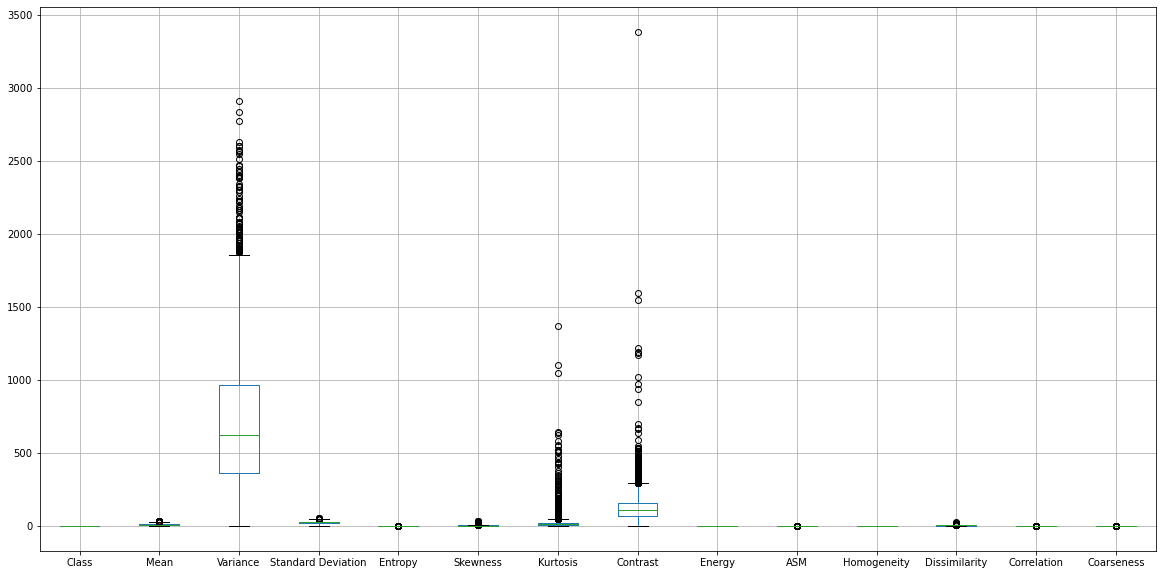

In [5]:
### Boxplot
df.boxplot(figsize=(20,10))

array([[<AxesSubplot:title={'center':'Class'}>,
        <AxesSubplot:title={'center':'Mean'}>,
        <AxesSubplot:title={'center':'Variance'}>,
        <AxesSubplot:title={'center':'Standard Deviation'}>],
       [<AxesSubplot:title={'center':'Entropy'}>,
        <AxesSubplot:title={'center':'Skewness'}>,
        <AxesSubplot:title={'center':'Kurtosis'}>,
        <AxesSubplot:title={'center':'Contrast'}>],
       [<AxesSubplot:title={'center':'Energy'}>,
        <AxesSubplot:title={'center':'ASM'}>,
        <AxesSubplot:title={'center':'Homogeneity'}>,
        <AxesSubplot:title={'center':'Dissimilarity'}>],
       [<AxesSubplot:title={'center':'Correlation'}>,
        <AxesSubplot:title={'center':'Coarseness'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

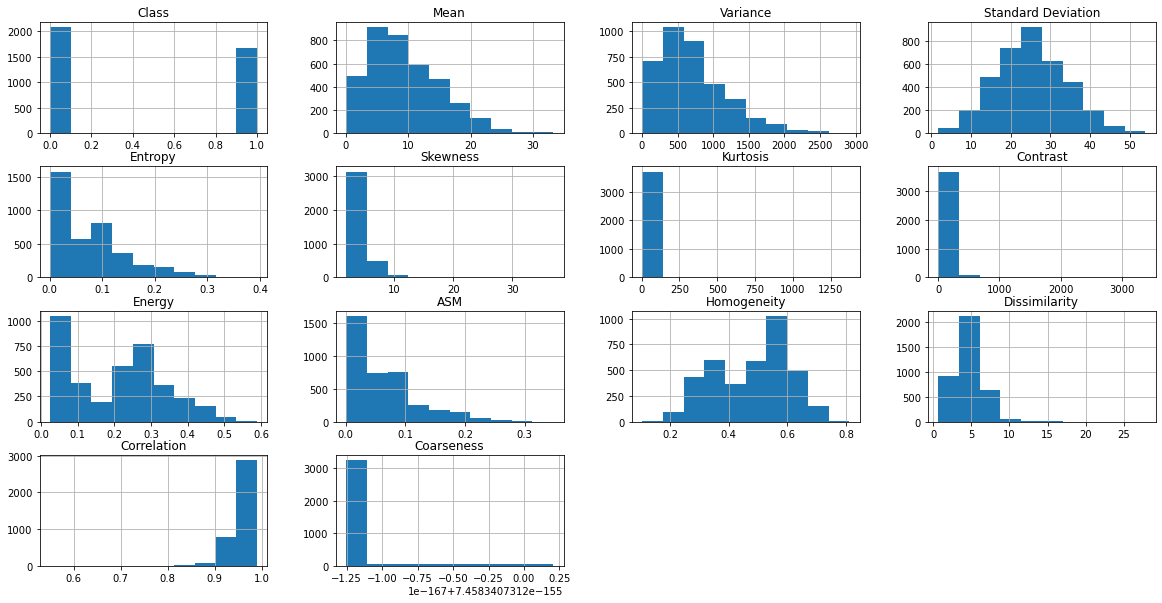

In [15]:
df.hist(figsize=(20,10))

Class
0    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
dtype: object

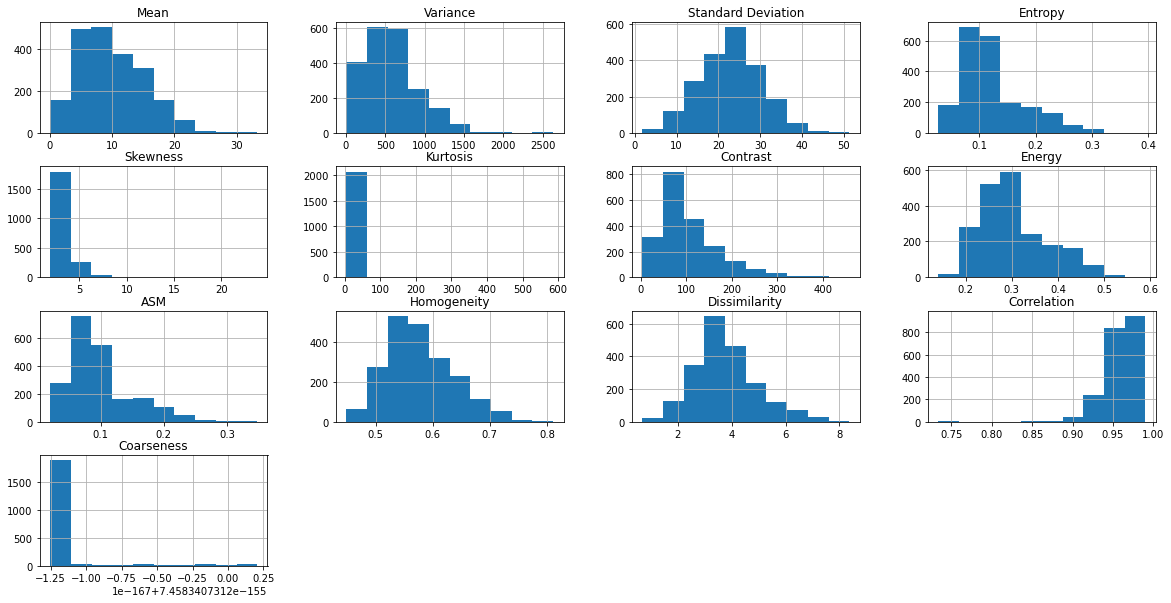

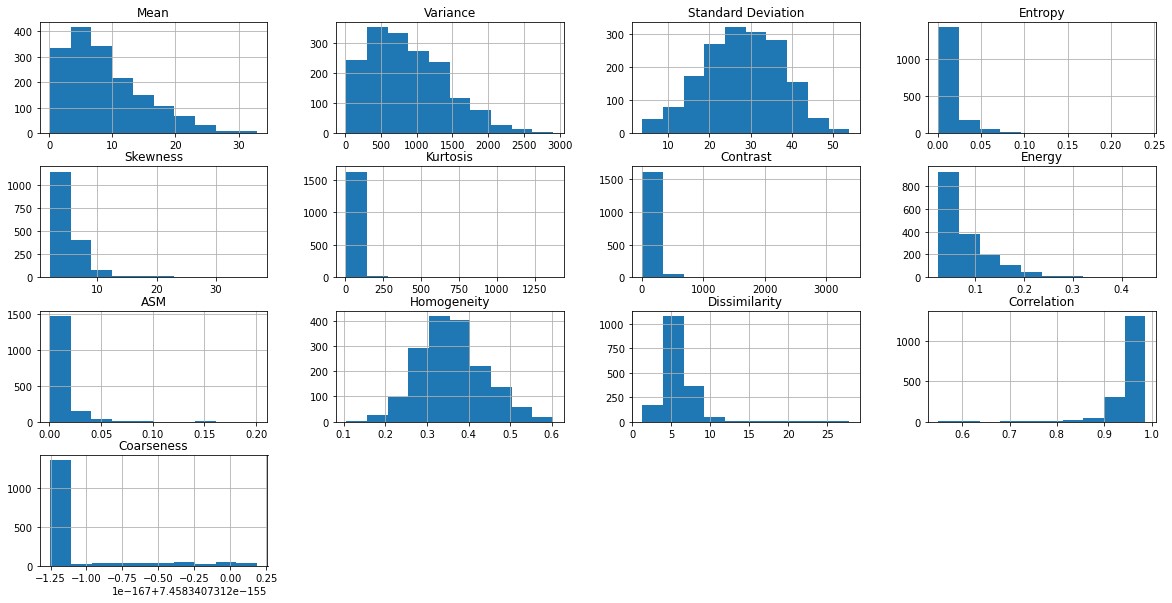

In [16]:
### Distribution of each attribute with respect to Class attribute
df.groupby('Class').hist(figsize=(20,10))

Class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Mean, dtype: object

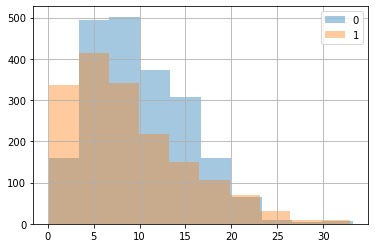

In [6]:
### Comparing the distribution of 'Mean' wrt to Class 1 and Class 0
df.groupby('Class').Mean.hist(alpha=0.4,legend=True)

## Data Transformation

### 1.  Handling Missing Values

In [7]:
###  To find the missing values in every feature
df.isnull().sum()

Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

<AxesSubplot:>

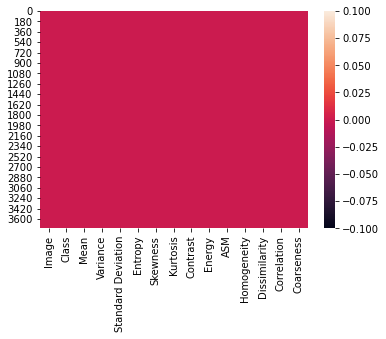

In [4]:
sns.heatmap(df.isnull(), cbar=True)

### 2. Data Cleansing : Outlier Detection and Removal

In [7]:
# Setting an upper and lower limit for outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [8]:
# The function that examines whether there is an outlier according to the threshold values we have determined.
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [9]:
for col in df.columns:
    print(col, check_outlier(df, col))

Class False
Mean True
Variance True
Standard Deviation True
Entropy True
Skewness True
Kurtosis True
Contrast True
Energy False
ASM True
Homogeneity False
Dissimilarity True
Correlation True
Coarseness True


<AxesSubplot:>

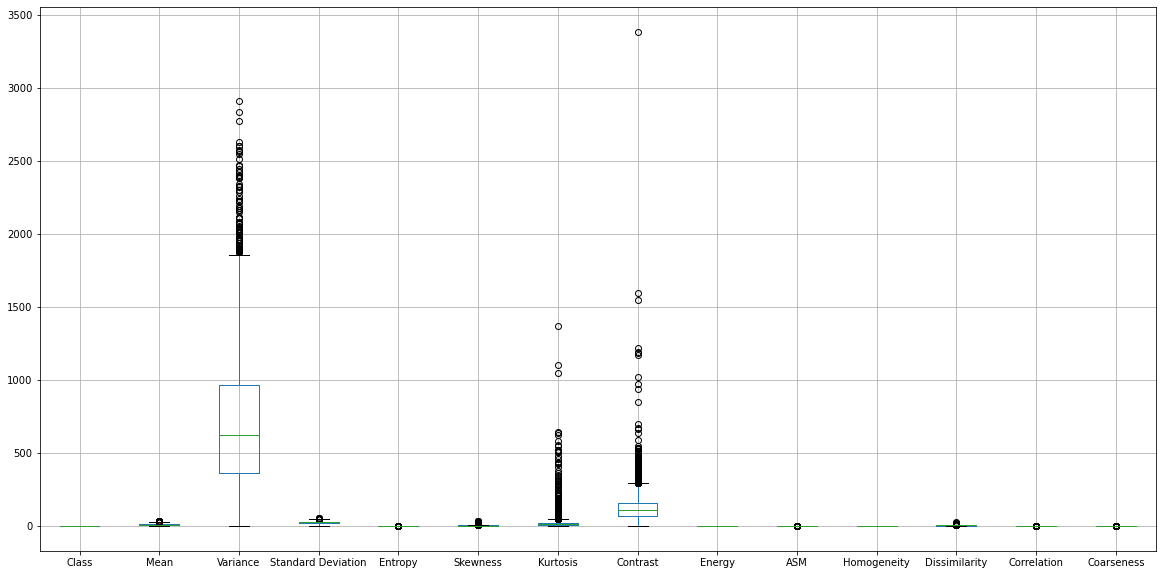

In [10]:
### Boxplot
df.boxplot(figsize=(20,10))

In [10]:
# Replacing outliers with upper and lower limit
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [11]:
for col in df.columns:
        replace_with_thresholds(df, col)

<AxesSubplot:>

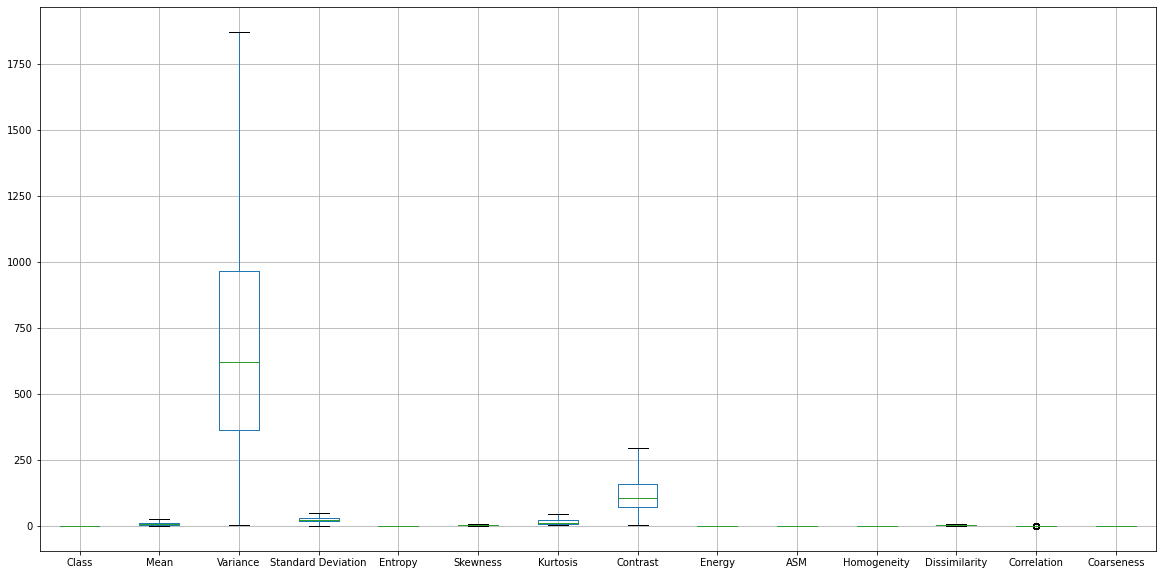

In [13]:
df.boxplot(figsize=(20,10))

In [14]:
df.shape

(3762, 14)

In [12]:
for col in df.columns:
    print(col, check_outlier(df, col))

Class False
Mean False
Variance False
Standard Deviation False
Entropy False
Skewness False
Kurtosis False
Contrast False
Energy False
ASM False
Homogeneity False
Dissimilarity False
Correlation True
Coarseness False


In [13]:
X = df.drop('Class',axis=1)   ### independent features
y = df['Class']               ### dependent features

# Dimensionality Reduction

## 1. Feature Selection

#### Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select the best features

In [15]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [16]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [17]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [18]:
featureScores

,Specs,Score
0,Mean,123.124729
1,Variance,103854.495031
2,Standard Deviation,935.344852
3,Entropy,151.972629
4,Skewness,635.713523
5,Kurtosis,9550.360760
6,Contrast,9564.673039
7,Energy,228.638330
8,ASM,123.967254
9,Homogeneity,92.254340


### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [11]:
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(criterion ='gini')
model.fit(X,y)

ExtraTreesClassifier()

In [12]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.01358045 0.02895233 0.02173973 0.18565271 0.06690791 0.05864916
 0.01128114 0.21651376 0.20826889 0.1385804  0.04195045 0.00792305
 0.        ]


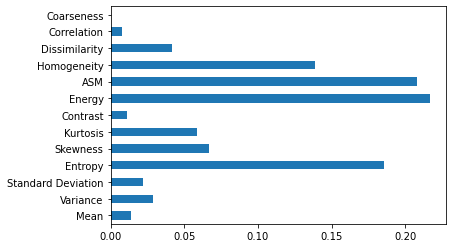

In [13]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

### Interpreting from the above two techniques , we come to the conclusion that the 'Coarseness' and 'Correlation' features do not affect the Class in any significant way. Hence we can drop the mentioned features.

In [14]:
X.drop(['Correlation', 'Coarseness'] , axis=1,inplace=True)

In [32]:
X.head(2)

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity
0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346
1,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.216085,0.651352,3.220072


### 2. Feature Extraction : Principal Component Analysis

In [25]:
X.shape

(3762, 11)

In [33]:
X2 = X.copy()

In [34]:
y2 = y.copy()

In [51]:
from sklearn.decomposition import PCA
plt.style.use('ggplot')
scaler = StandardScaler()
scaler.fit(X2)
X2 = scaler.transform(X2)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X2) # project the original data into the PCA space

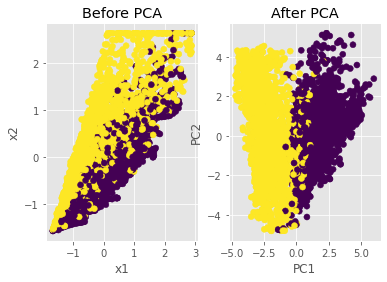

In [53]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X2[:,0], X2[:,1], c=y2)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y2)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [54]:
print(pca.explained_variance_ratio_)

[0.4698753  0.33473001]


In [57]:
print(abs( pca.components_ ))

[[0.02712533 0.15632497 0.14976919 0.39241081 0.24238139 0.24793107
  0.21580208 0.40722456 0.38878011 0.42434088 0.36684271]
 [0.4961523  0.44753551 0.45696759 0.0902508  0.40599557 0.3976439
  0.00917232 0.05228488 0.09400698 0.02064098 0.03931935]]


### Seeing the feature variance values showing their importances we can say that it would not be advisable to remove any more features as almost all of the 11 features have a very low value so it would become difficult to choose a threshold.

### Feature Normalization

In [15]:
### Holdout Method : Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [43]:
X_train.shape

(3009, 11)

In [44]:
X_test.shape

(753, 11)

In [45]:
y_train.shape

(3009,)

In [46]:
y_test.shape

(753,)

In [16]:
scaler=StandardScaler()
### fit vs fit_transform
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train) , columns =X.columns )

In [17]:
X_test_scaled=pd.DataFrame(scaler.transform(X_test) , columns =X.columns)

In [49]:
X_train_scaled.head()

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity
0,-0.534134,-0.655332,-0.556303,0.880608,-0.209192,-0.330615,0.120539,0.954221,0.865914,0.630984,0.057089
1,0.980327,0.598811,0.684292,0.284482,-0.846419,-0.809710,0.461359,0.502246,0.253069,0.807577,-0.581658
2,-0.091252,-0.747070,-0.674654,0.361069,-0.801516,-0.784010,-1.103800,0.564085,0.329814,0.729055,-1.088026
3,-0.803074,-1.106270,-1.218734,0.587839,-0.347042,-0.455287,-1.002010,0.737748,0.557380,0.879293,-1.099214
4,0.363062,-0.406400,-0.262294,-0.063088,-0.947126,-0.888273,-0.829058,0.186073,-0.104117,1.148012,-1.316261


In [50]:
X_test_scaled.head()

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity
0,0.746639,-0.259789,-0.103828,-0.077097,-1.038595,-0.931934,-0.922287,0.172407,-0.118228,0.349207,-0.740002
1,-0.395174,1.201752,1.145869,-0.989500,0.868720,0.886072,0.319367,-1.154826,-0.964610,-1.442338,0.879072
2,0.768200,1.772599,1.538353,-0.831145,-0.353623,-0.434291,1.037547,-0.763420,-0.822876,-0.746196,0.681485
3,-1.191410,-0.822738,-0.777354,-1.010454,2.018885,2.204254,-1.358228,-1.238080,-0.983120,-1.404120,-0.514859
4,0.469368,-0.176318,-0.017567,0.600118,-0.870421,-0.820829,-0.159863,0.749415,0.573305,0.892574,-0.819111


In [51]:
y_train[0:5]

1607    0.0
1678    0.0
1520    0.0
1805    0.0
946     0.0
Name: Class, dtype: float64

## Applying Algorithms on our scaled and transformed data

### 1. Naive Bayes Classifier

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       439
         1.0       1.00      0.98      0.99       314

    accuracy                           0.99       753
   macro avg       0.99      0.99      0.99       753
weighted avg       0.99      0.99      0.99       753

Naive Bayes Test Accuracy :  99.20318725099602 %
Training Accuracy:  97.04220671319376 %

TP Rate :  0.9840764331210191
TN Rate :  0.9977220956719818
FP Rate :  0.0032258064516129032
FN Rate :  0.01592356687898089
Success Rate:  0.9920318725099602
Misclassifiaction Rate:  0.00796812749003984


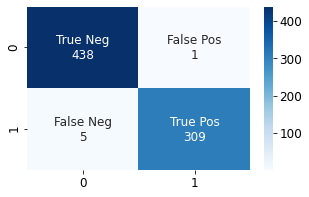

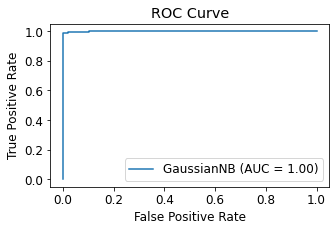

In [85]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

print(classification_report(y_test, y_pred_nb))

print('Naive Bayes Test Accuracy : ',accuracy_score(y_test, y_pred_nb)*100,'%')
print('Training Accuracy: ',accuracy_score(y_train, nb.predict(X_train_scaled))*100,'%')

cm_nb = confusion_matrix(y_test, y_pred_nb)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_nb.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm_nb,annot=labels,fmt='',cmap = 'Blues')
print()

TP_nb = cm_nb[1][1]
FP_nb = cm_nb[0][1]
FN_nb = cm_nb[1][0]
TN_nb = cm_nb[0][0] 

print('TP Rate : ',TP_nb / (TP_nb+FN_nb))
print('TN Rate : ', TN_nb/(FP_nb+TN_nb))
print('FP Rate : ', FP_nb/(FP_nb+TP_nb))
print('FN Rate : ', FN_nb/(FN_nb+TP_nb))
print('Success Rate: ', (TP_nb+TN_nb)/(TP_nb+FP_nb+FN_nb+TN_nb))
print('Misclassifiaction Rate: ', (FP_nb+FN_nb)/(TP_nb+FP_nb+FN_nb+TN_nb))

metrics.plot_roc_curve(nb, X_test_scaled, y_test) 
plt.title('ROC Curve')
plt.show()

### 2. K Nearest Neighbours

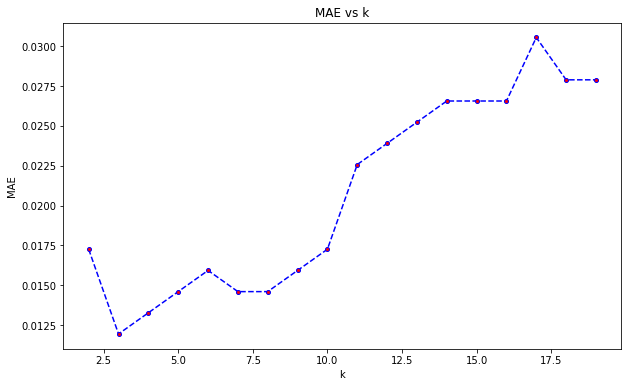



Value of k for which MAE is minimum :  2


In [34]:
k_min  = 2
test_error_rate = []
k_array = []
MAE = 1

for k in range(2,20):
    
    model = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled,y_train)
    predict_y = model.predict(X_test_scaled)
    y_true = y_test
    test_MAE = mean_absolute_error(y_true,predict_y)
    if test_MAE < MAE:
        MAE = test_MAE
        k1_min = k
    test_error_rate.append(test_MAE)
    k_array.append(k)
    
plt.figure(figsize=(10,6))
plt.plot(k_array,test_error_rate,'b',linestyle='dashed',marker='o',
         markerfacecolor='red', markersize=4)
plt.title('MAE vs k')
plt.xlabel('k')
plt.ylabel('MAE')
plt.show()
print('\n')
print("Value of k for which MAE is minimum : ",k_min)

WITH K=2

TP Rate :  0.9872611464968153
TN Rate :  1.0
FP Rate :  0.0
FN Rate :  0.012738853503184714
Success Rate:  0.9946879150066401
Misclassifiaction Rate:  0.005312084993359893
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       439
         1.0       1.00      0.99      0.99       314

    accuracy                           0.99       753
   macro avg       1.00      0.99      0.99       753
weighted avg       0.99      0.99      0.99       753

KNN Test Accuracy :  99.46879150066401 %
Training Accuracy:  98.93652376204719 %


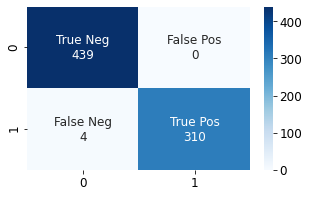

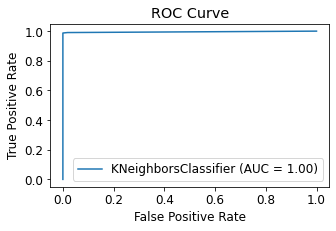

In [86]:
# NOW WITH K=2
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train_scaled,y_train)
pred_knn = knn.predict(X_test_scaled)

print('WITH K=2')
cm_knn = confusion_matrix(y_test, pred_knn)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_knn.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm_knn,annot=labels,fmt='',cmap='Blues')
print()

TP_knn = cm_knn[1][1]
FP_knn = cm_knn[0][1]
FN_knn = cm_knn[1][0]
TN_knn = cm_knn[0][0] 

print('TP Rate : ',TP_knn / (TP_knn+FN_knn))
print('TN Rate : ', TN_knn/(FP_knn+TN_knn))
print('FP Rate : ', FP_knn/(FP_knn+TP_knn))
print('FN Rate : ', FN_knn/(FN_knn+TP_knn))
print('Success Rate: ', (TP_knn+TN_knn)/(TP_knn+FP_knn+FN_knn+TN_knn))
print('Misclassifiaction Rate: ', (FP_knn+FN_knn)/(TP_knn+FP_knn+FN_knn+TN_knn))

print(classification_report(y_test,pred_knn))

print('KNN Test Accuracy : ',accuracy_score(y_test, pred_knn)*100,'%')
print('Training Accuracy: ',accuracy_score(y_train, knn.predict(X_train_scaled))*100,'%')

metrics.plot_roc_curve(knn, X_test_scaled, y_test) 
plt.title('ROC Curve')
plt.show()




### 3. Support Vector Machines

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


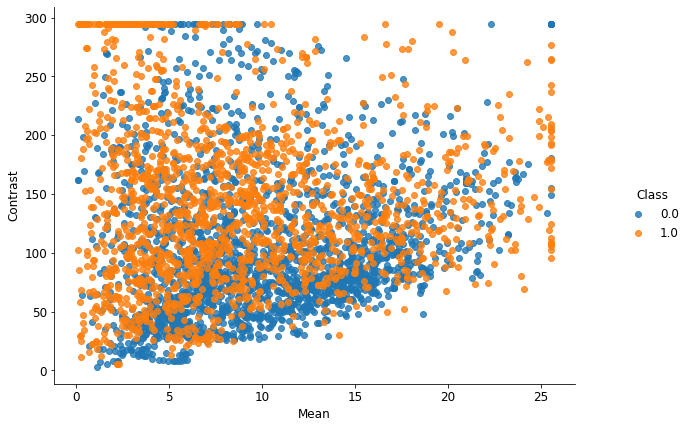

In [61]:
sns.lmplot('Mean', 'Contrast', df, hue='Class', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show()

### Using GridSearchCV for Hyperparameter Tuning for SVC

In [72]:
classifier=SVC()

parameters = [{'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7,
                     2.0,1, 10, 100, 1000], 'kernel': ['linear']},
              
              {'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7,
                     2.0,1, 10, 100, 1000], 'kernel': ['rbf'],
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
              
              {'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7,
                     2.0,1, 10, 100, 1000], 'kernel': ['poly']}]
kfold = KFold(n_splits=10, random_state=21,shuffle=True)
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = kfold,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_params_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}



TP Rate :  0.9968152866242038
TN Rate :  0.9954441913439636
FP Rate :  0.006349206349206349
FN Rate :  0.0031847133757961785
Success Rate:  0.9960159362549801
Misclassifiaction Rate:  0.00398406374501992
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       439
         1.0       0.99      1.00      1.00       314

    accuracy                           1.00       753
   macro avg       1.00      1.00      1.00       753
weighted avg       1.00      1.00      1.00       753

SVC Test Accuracy :  99.60159362549801 %
Training Accuracy:  99.7341309405118 %


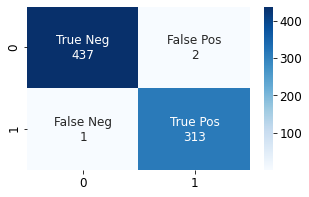

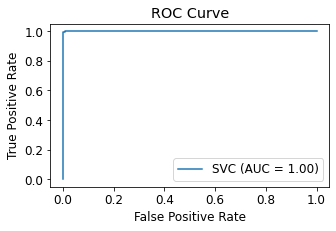

In [89]:
classifier_svc = SVC(kernel = 'rbf',C = 100,gamma=0.1)
classifier_svc.fit(X_train_scaled, y_train)
y_pred_svc = classifier_svc.predict(X_test_scaled)

cm_svc = confusion_matrix(y_test, y_pred_svc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_svc.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm_svc,annot=labels,fmt='',cmap='Blues')
print()

TP_svc = cm_svc[1][1]
FP_svc = cm_svc[0][1]
FN_svc = cm_svc[1][0]
TN_svc = cm_svc[0][0] 

print('TP Rate : ',TP_svc / (TP_svc+FN_svc))
print('TN Rate : ', TN_svc/(FP_svc+TN_svc))
print('FP Rate : ', FP_svc/(FP_svc+TP_svc))
print('FN Rate : ', FN_svc/(FN_svc+TP_svc))
print('Success Rate: ', (TP_svc+TN_svc)/(TP_svc+FP_svc+FN_svc+TN_svc))
print('Misclassifiaction Rate: ', (FP_svc+FN_svc)/(TP_svc+FP_svc+FN_svc+TN_svc))

print(classification_report(y_test,y_pred_svc))

print('SVC Test Accuracy : ',accuracy_score(y_test, y_pred_svc)*100,'%')
print('Training Accuracy: ',accuracy_score(y_train, classifier_svc.predict(X_train_scaled))*100,'%')

metrics.plot_roc_curve(classifier_svc, X_test_scaled, y_test) 
plt.title('ROC Curve')
plt.show()

### 4. Building A Neural Network

There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:

The number of hidden neurons should be between the size of the input layer and the size of the output layer.
The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
The number of hidden neurons should be less than twice the size of the input layer.

In [18]:
model = Sequential()

input_dim = X_train_scaled.shape[1]

#add input layer 
model.add(Dense(units =256, activation = 'relu', input_dim = input_dim))
model.add(Dropout(0.4))

# hidden layer
model.add(Dense(units =75,activation = 'relu'))
model.add(Dropout(0.4))

#output layer
model.add(Dense(units = 1, activation = 'sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer = opt , loss ='binary_crossentropy', metrics = ['accuracy'])

model_history = model.fit(X_train_scaled, y_train,validation_split=0.20, batch_size = 64, epochs = 50)

Epoch 1/50
38/38 [==============================] - 10s 170ms/step - loss: 0.6572 - accuracy: 0.5946 - val_loss: 0.5019 - val_accuracy: 0.9302
Epoch 2/50
38/38 [==============================] - 0s 4ms/step - loss: 0.4892 - accuracy: 0.8752 - val_loss: 0.3685 - val_accuracy: 0.9452
Epoch 3/50
38/38 [==============================] - 0s 3ms/step - loss: 0.3805 - accuracy: 0.9159 - val_loss: 0.2740 - val_accuracy: 0.9601
Epoch 4/50
38/38 [==============================] - 0s 5ms/step - loss: 0.3056 - accuracy: 0.9369 - val_loss: 0.2106 - val_accuracy: 0.9635
Epoch 5/50
38/38 [==============================] - 0s 4ms/step - loss: 0.2430 - accuracy: 0.9492 - val_loss: 0.1685 - val_accuracy: 0.9651
Epoch 6/50
38/38 [==============================] - 0s 4ms/step - loss: 0.1962 - accuracy: 0.9548 - val_loss: 0.1396 - val_accuracy: 0.9668
Epoch 7/50
38/38 [==============================] - 0s 4ms/step - loss: 0.1618 - accuracy: 0.9611 - val_loss: 0.1189 - val_accuracy: 0.9684
Epoch 8/50
38/38 


TP Rate :  0.9904458598726115
TN Rate :  0.9954441913439636
FP Rate :  0.006389776357827476
FN Rate :  0.009554140127388535
Success Rate:  0.9933598937583001
Misclassifiaction Rate:  0.006640106241699867
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       439
         1.0       0.99      0.99      0.99       314

    accuracy                           0.99       753
   macro avg       0.99      0.99      0.99       753
weighted avg       0.99      0.99      0.99       753

Neural Network Test Accuracy :  99.33598937583001 %


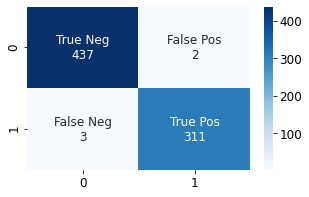

In [90]:
y_pred_nn = model.predict(X_test_scaled)
y_pred_nn = (y_pred_nn > 0.5)

cm_nn = confusion_matrix(y_test, y_pred_nn)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_nn.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm_nn,annot=labels,fmt='',cmap='Blues')
print()


TP_nn = cm_nn[1][1]
FP_nn = cm_nn[0][1]
FN_nn = cm_nn[1][0]
TN_nn = cm_nn[0][0] 

print('TP Rate : ',TP_nn / (TP_nn+FN_nn))
print('TN Rate : ', TN_nn/(FP_nn+TN_nn))
print('FP Rate : ', FP_nn/(FP_nn+TP_nn))
print('FN Rate : ', FN_nn/(FN_nn+TP_nn))
print('Success Rate: ', (TP_nn+TN_nn)/(TP_nn+FP_nn+FN_nn+TN_nn))
print('Misclassifiaction Rate: ', (FP_nn+FN_nn)/(TP_nn+FP_nn+FN_nn+TN_nn))

print(classification_report(y_test,y_pred_nn))

print('Neural Network Test Accuracy : ',accuracy_score(y_test, y_pred_nn)*100,'%')


In [77]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


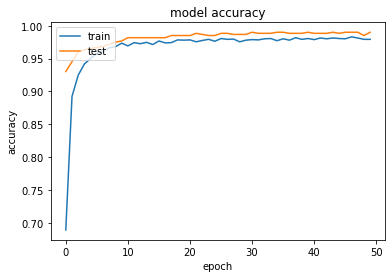

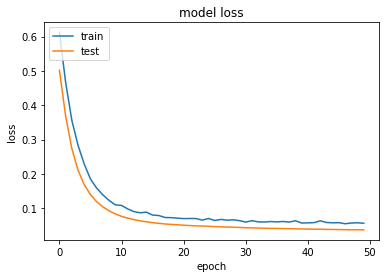

In [22]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 5. Decision Tree Classifier

In [67]:
tree = DecisionTreeClassifier(criterion='gini' ,random_state = 1)
tree.fit(X_train_scaled , y_train)
y_train_pred = tree.predict(X_train_scaled)
y_test_pred = tree.predict(X_test_scaled)

In [68]:
print(accuracy_score(y_train,y_train_pred) , round(accuracy_score(y_test,y_test_pred),2))

1.0 0.99


[Text(1618.1999999999998, 2646.4736842105262, 'X[3] <= -0.307\ngini = 0.496\nsamples = 3009\nvalue = [1640, 1369]'),
 Text(748.0216216216215, 2503.421052631579, 'X[5] <= -0.943\ngini = 0.025\nsamples = 1322\nvalue = [17, 1305]'),
 Text(554.9837837837838, 2360.3684210526317, 'X[0] <= 2.297\ngini = 0.488\nsamples = 26\nvalue = [15, 11]'),
 Text(458.46486486486486, 2217.315789473684, 'X[7] <= -0.643\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(361.94594594594594, 2074.2631578947367, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(554.9837837837838, 2074.2631578947367, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(651.5027027027027, 2217.315789473684, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(941.0594594594594, 2360.3684210526317, 'X[5] <= -0.92\ngini = 0.003\nsamples = 1296\nvalue = [2, 1294]'),
 Text(844.5405405405405, 2217.315789473684, 'X[2] <= 0.509\ngini = 0.188\nsamples = 19\nvalue = [2, 17]'),
 Text(748.0216216216215, 2074.2631578947367, 'X[9] <= 0.187\ng

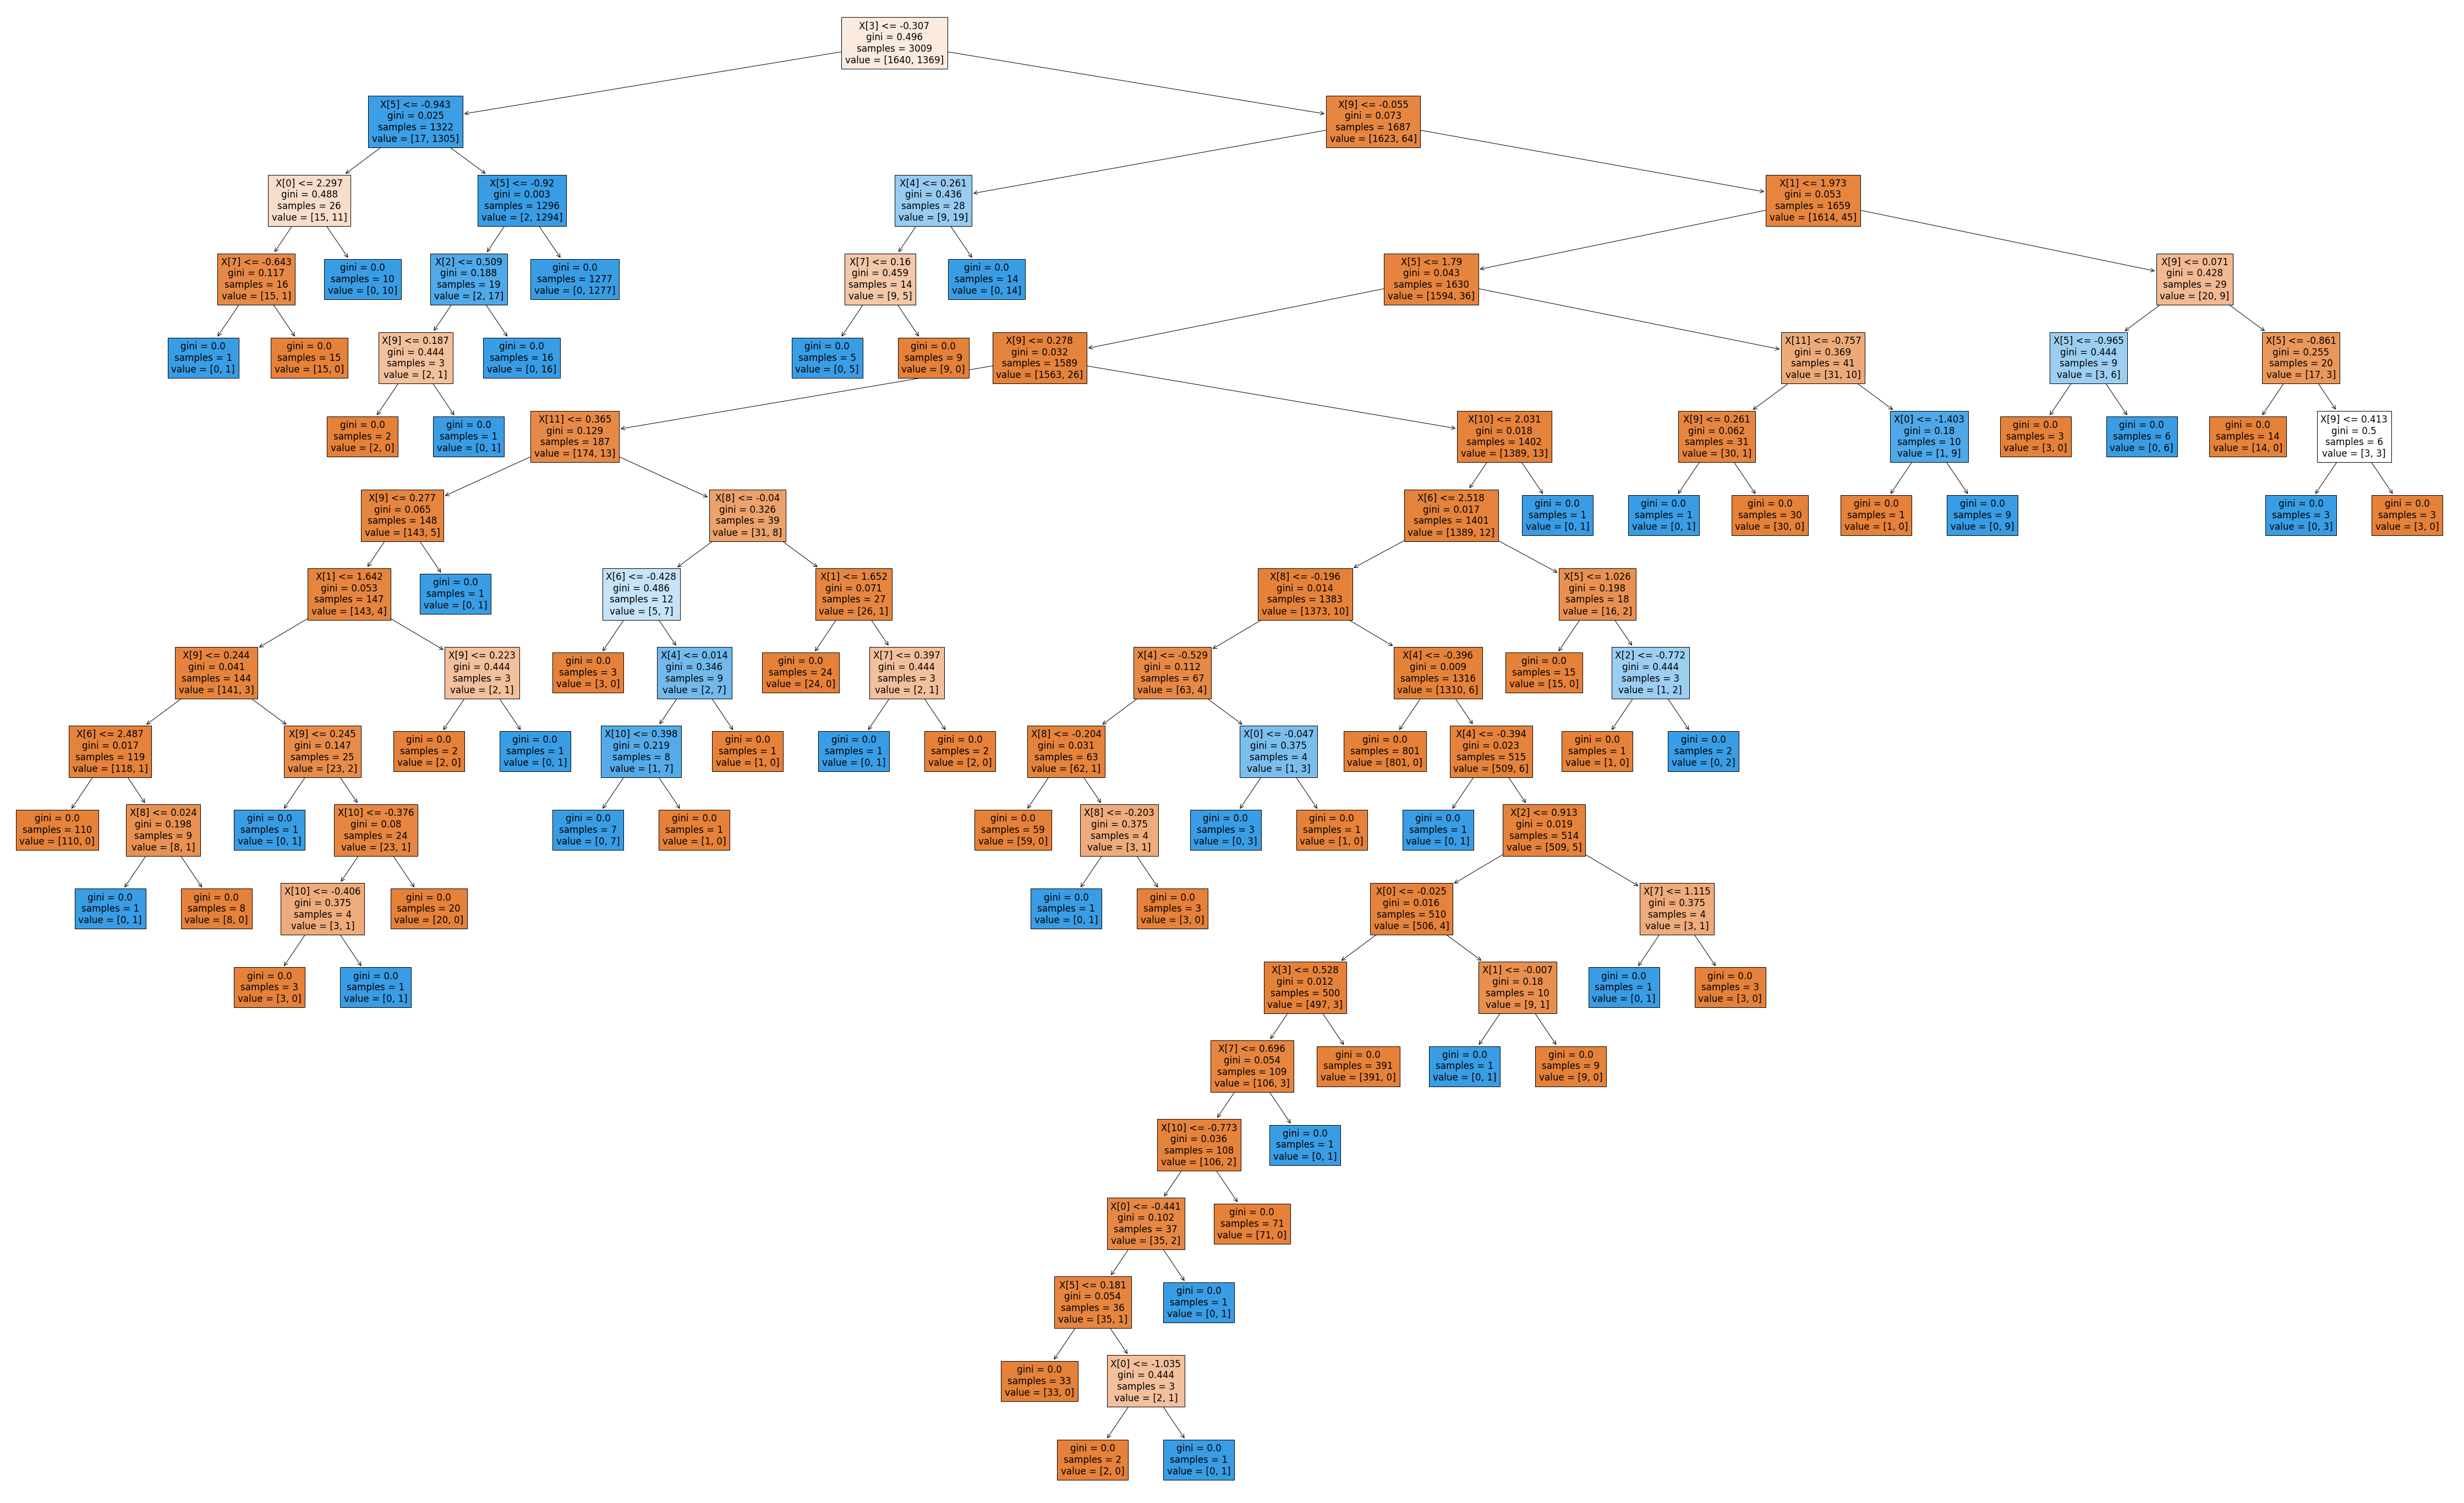

In [87]:
rcParams['figure.figsize'] = 80,50
plot_tree(tree,filled=True)

### By default, the Decision Tree function doesn’t perform any pruning and allows the tree to grow as much as it can. And thus overfitting occurs as can seen in the above image of our tree.

### Hyperparameter Tuning Using GridSearchCV


In [73]:
param_dist = {
    "criterion" : ["gini" , "entropy"] , 
    "max_depth" : [1,2,3,4,5,6,7,8,9,10,None] , 
    "min_samples_split" : [10,20,50,80,100,200,300,500]
}
kfold = KFold(n_splits=10, random_state=21,shuffle=True)
grid_dt = GridSearchCV(tree , param_grid = param_dist , cv=kfold , n_jobs=-1)
grid_dt.fit(X_train_scaled,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=21, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'min_samples_split': [10, 20, 50, 80, 100, 200, 300,
                                               500]})

In [74]:
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 10}

TP Rate :  0.9968152866242038
TN Rate :  0.9908883826879271
FP Rate :  0.012618296529968454
FN Rate :  0.0031847133757961785
Success Rate:  0.9933598937583001
Misclassifiaction Rate:  0.006640106241699867
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       439
         1.0       0.99      1.00      0.99       314

    accuracy                           0.99       753
   macro avg       0.99      0.99      0.99       753
weighted avg       0.99      0.99      0.99       753

Decision Tree Test Accuracy :  99.33598937583001 %
Training Accuracy:  98.96975739448321 %


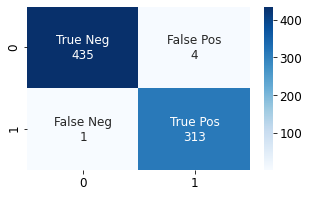

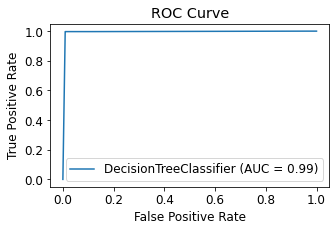

In [91]:
rcParams['figure.figsize'] = 5,3
tree2 = DecisionTreeClassifier(criterion='gini', max_depth= 6 , min_samples_split=10)
tree2.fit(X_train_scaled , y_train)
y_pred_dt = tree2.predict(X_test_scaled)

cm_dt = confusion_matrix(y_test, y_pred_dt)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_dt.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_dt,annot=labels,fmt='',cmap='Blues')

TP_dt = cm_dt[1][1]
FP_dt = cm_dt[0][1]
FN_dt = cm_dt[1][0]
TN_dt = cm_dt[0][0] 

print('TP Rate : ',TP_dt / (TP_dt+FN_dt))
print('TN Rate : ', TN_dt/(FP_dt+TN_dt))
print('FP Rate : ', FP_dt/(FP_dt+TP_dt))
print('FN Rate : ', FN_dt/(FN_dt+TP_dt))
print('Success Rate: ', (TP_dt+TN_dt)/(TP_dt+FP_dt+FN_dt+TN_dt))
print('Misclassifiaction Rate: ', (FP_dt+FN_dt)/(TP_dt+FP_dt+FN_dt+TN_dt))

print(classification_report(y_test,y_pred_dt))

print('Decision Tree Test Accuracy : ',accuracy_score(y_test, y_pred_dt)*100,'%')
print('Training Accuracy: ',accuracy_score(y_train, tree2.predict(X_train_scaled))*100,'%')

metrics.plot_roc_curve(tree2, X_test_scaled, y_test) 
plt.title('ROC Curve')
plt.show()

[Text(1673.9999999999998, 2523.8571428571427, 'X[3] <= -0.307\ngini = 0.496\nsamples = 3009\nvalue = [1640, 1369]'),
 Text(797.1428571428571, 2135.5714285714284, 'X[5] <= -0.943\ngini = 0.025\nsamples = 1322\nvalue = [17, 1305]'),
 Text(478.2857142857142, 1747.2857142857142, 'X[0] <= 2.297\ngini = 0.488\nsamples = 26\nvalue = [15, 11]'),
 Text(318.85714285714283, 1359.0, 'X[10] <= -0.685\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(159.42857142857142, 970.7142857142858, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(478.2857142857142, 970.7142857142858, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(637.7142857142857, 1359.0, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(1116.0, 1747.2857142857142, 'X[5] <= -0.92\ngini = 0.003\nsamples = 1296\nvalue = [2, 1294]'),
 Text(956.5714285714284, 1359.0, 'X[2] <= 0.509\ngini = 0.188\nsamples = 19\nvalue = [2, 17]'),
 Text(797.1428571428571, 970.7142857142858, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(1116.0, 97

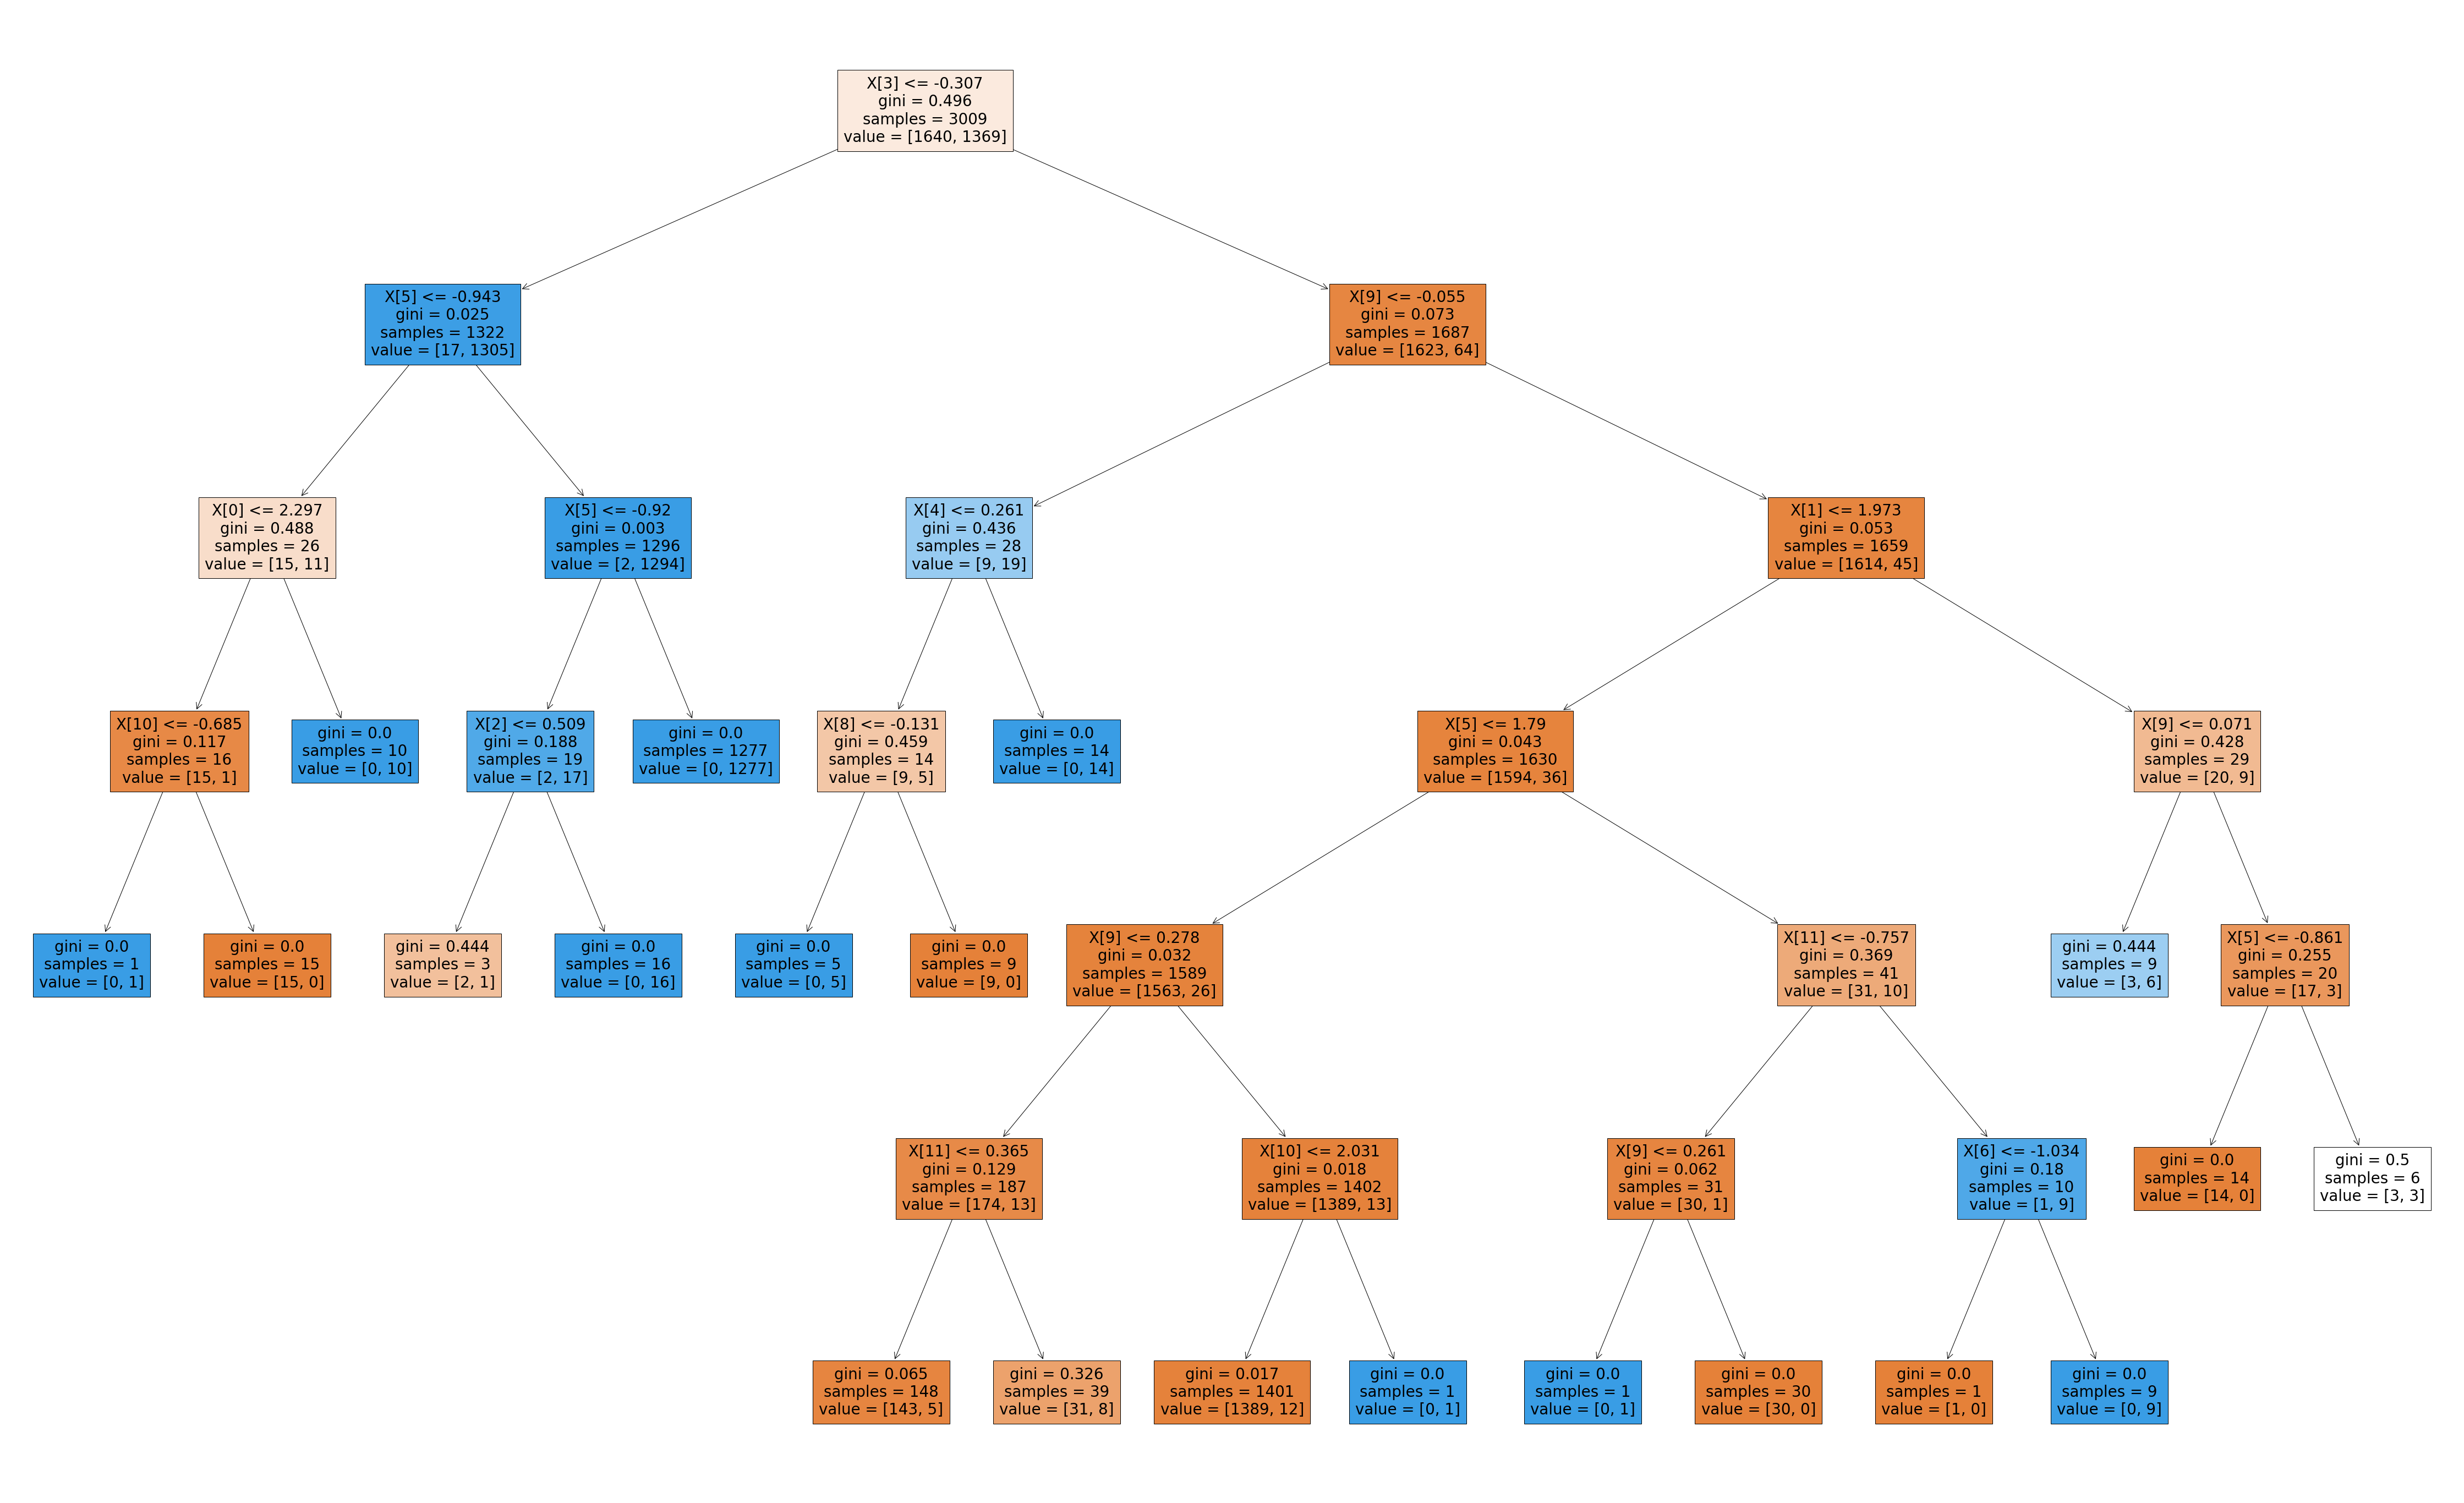

In [86]:
rcParams['figure.figsize'] = 80,50
plot_tree(tree2,filled=True)

### 6. Tree Ensembles

### 6.1 Bagging

In [96]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    max_features=0.5,
    n_estimators=50,
    max_samples=0.5,
    bootstrap=True,
    oob_score=True,
)
bag.fit(X_train_scaled,y_train)
print('OOB Score without hyperparameter tuning : ',(bag.oob_score_)*100,'%')

OOB Score without hyperparameter tuning :  98.43801927550682 %


In [97]:
parameters = {
    'n_estimators': [50,100,500], 
    'max_samples': [0.1,0.2,0.4,0.7,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.2,0.4,0.7,1.0]
    }
kfold = KFold(n_splits=10, random_state=21,shuffle=True)
search = GridSearchCV(bag, parameters, cv=kfold,verbose = 1 , n_jobs=-1)
search.fit(X_train_scaled,y_train)
search.best_params_

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  4.4min finished


{'bootstrap': True,
 'max_features': 0.4,
 'max_samples': 1.0,
 'n_estimators': 500}

OOB Score with hyperparameter tuning :  98.60418743768695 %

TP Rate :  0.9936305732484076
TN Rate :  0.9977220956719818
FP Rate :  0.003194888178913738
FN Rate :  0.006369426751592357
Success Rate:  0.9960159362549801
Misclassifiaction Rate:  0.00398406374501992
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       439
         1.0       1.00      0.99      1.00       314

    accuracy                           1.00       753
   macro avg       1.00      1.00      1.00       753
weighted avg       1.00      1.00      1.00       753

Bagging Test Accuracy :  99.60159362549801 %
Training Accuracy:  100.0 %


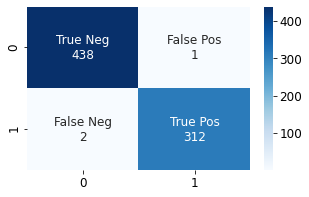

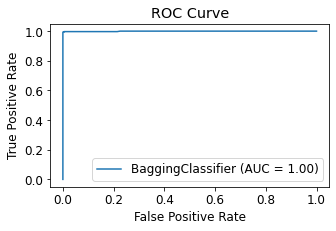

In [92]:
bag2 = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    max_features=0.4,
    n_estimators=500,
    max_samples=1.0,
    bootstrap=True,
    oob_score=True,
)

bag2.fit(X_train_scaled,y_train)
y_pred_bag = bag2.predict(X_test_scaled)
print('OOB Score with hyperparameter tuning : ',(bag2.oob_score_)*100,'%')

cm_bag = confusion_matrix(y_test, y_pred_bag)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_bag.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_bag,annot=labels,fmt='',cmap='Blues')
print()

TP_bag = cm_bag[1][1]
FP_bag = cm_bag[0][1]
FN_bag = cm_bag[1][0]
TN_bag = cm_bag[0][0] 

print('TP Rate : ',TP_bag / (TP_bag+FN_bag))
print('TN Rate : ', TN_bag/(FP_bag+TN_bag))
print('FP Rate : ', FP_bag/(FP_bag+TP_bag))
print('FN Rate : ', FN_bag/(FN_bag+TP_bag))
print('Success Rate: ', (TP_bag+TN_bag)/(TP_bag+FP_bag+FN_bag+TN_bag))
print('Misclassifiaction Rate: ', (FP_bag+FN_bag)/(TP_bag+FP_bag+FN_bag+TN_bag))

print(classification_report(y_test, y_pred_bag))

print('Bagging Test Accuracy : ',accuracy_score(y_test, y_pred_bag)*100,'%')
print('Training Accuracy: ',accuracy_score(y_train, bag2.predict(X_train_scaled))*100,'%')

metrics.plot_roc_curve(bag2, X_test_scaled, y_test) 
plt.title('ROC Curve')
plt.show()

### 6.2 Random Forest

In [101]:
rf = RandomForestClassifier(bootstrap = True ,
                            n_estimators = 50,
                            max_features = 0.5,
                            criterion='entropy', 
                            max_depth= None, 
                            min_samples_split=10)
rf.fit(X_train_scaled , y_train)
y_train_pred_rf = rf.predict(X_train_scaled)
y_test_pred_rf = rf.predict(X_test_scaled)

print(accuracy_score(y_train,y_train_pred_rf)*100 , round(accuracy_score(y_test,y_test_pred_rf),2)*100)

99.70089730807578 100.0


In [118]:
rf_params = {
    'n_estimators': [50,100,200],
    "max_depth": [1,2,3,4,5,6,7,8,9,10,None],
    "min_samples_split" : [10,20,50,80,100,200,300,500],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.2,0.4,0.7,1.0],
    'criterion' : ['gini','entropy']
    
}

search_rf = GridSearchCV(rf, rf_params, cv=5,verbose = 1 , n_jobs=-1)
search_rf.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 5280 candidates, totalling 26400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              max_features=0.5,
                                              min_samples_split=10,
                                              n_estimators=50),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'max_features': [0.1, 0.2, 0.4, 0.7, 1.0],
                         'min_samples_split': [10, 20, 50, 80, 100, 200, 300,
                                               500],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [119]:
search_rf.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 0.7,
 'min_samples_split': 10,
 'n_estimators': 100}


TP Rate :  0.9968152866242038
TN Rate :  1.0
FP Rate :  0.0
FN Rate :  0.0031847133757961785
Success Rate:  0.99867197875166
Misclassifiaction Rate:  0.0013280212483399733
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       439
         1.0       1.00      1.00      1.00       314

    accuracy                           1.00       753
   macro avg       1.00      1.00      1.00       753
weighted avg       1.00      1.00      1.00       753

OOB Score with hyperparameter tuning :  98.47125290794284 %
Random Forest Test Accuracy :  99.867197875166 %
Training Accuracy:  99.6011964107677 %


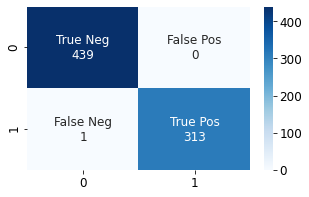

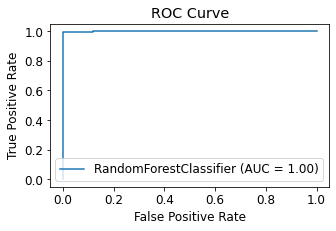

In [93]:
rf2 = RandomForestClassifier(bootstrap = True ,
                             oob_score=True,
                            n_estimators = 100,
                            max_features = 0.7,
                            criterion='entropy', 
                            max_depth= 9, 
                            min_samples_split=10)
rf2.fit(X_train_scaled , y_train)
y_train_pred_rf2 = rf2.predict(X_train_scaled)
y_test_pred_rf2 = rf2.predict(X_test_scaled)

cm_rf = confusion_matrix(y_test, y_test_pred_rf2)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_rf.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_rf,annot=labels,fmt='',cmap='Blues')
print()

TP_rf = cm_rf[1][1]
FP_rf = cm_rf[0][1]
FN_rf = cm_rf[1][0]
TN_rf = cm_rf[0][0] 

print('TP Rate : ',TP_rf / (TP_rf+FN_rf))
print('TN Rate : ', TN_rf/(FP_rf+TN_rf))
print('FP Rate : ', FP_rf/(FP_rf+TP_rf))
print('FN Rate : ', FN_rf/(FN_rf+TP_rf))
print('Success Rate: ', (TP_rf+TN_rf)/(TP_rf+FP_rf+FN_rf+TN_rf))
print('Misclassifiaction Rate: ', (FP_rf+FN_rf)/(TP_rf+FP_rf+FN_rf+TN_rf))

print(classification_report(y_test, y_test_pred_rf2))

print('OOB Score with hyperparameter tuning : ',(rf2.oob_score_)*100,'%')
print('Random Forest Test Accuracy : ',accuracy_score(y_test, y_test_pred_rf2)*100,'%')
print('Training Accuracy: ',accuracy_score(y_train, rf2.predict(X_train_scaled))*100,'%')

metrics.plot_roc_curve(rf2, X_test_scaled, y_test) 
plt.title('ROC Curve')
plt.show()

### 6.3 Boosting

#### 6.3.1 AdaBoost

In [71]:
ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100, random_state=42)
ada.fit(X_train_scaled,y_train)

print (f'Train Accuracy - : {ada.score(X_train_scaled,y_train):.3f}')
print (f'Test Accuracy - : {ada.score(X_test_scaled,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.989


In [73]:
ada_params = {
    'n_estimators': [50,100,200],
    'learning_rate' : [0.1,0.01,0.001,0.2,0.3,0.4,0.5],
    'random_state' : [0,20,40]
    }
kfold = KFold(n_splits=10, random_state=21,shuffle=True)
ada_cv = RandomizedSearchCV(ada, ada_params, cv=kfold , verbose=1,n_jobs=-1)
ada_cv.fit(X_train_scaled,y_train)
print(ada_cv.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.7s


{'random_state': 0, 'n_estimators': 200, 'learning_rate': 0.5}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   32.2s finished



TP Rate :  0.9968152866242038
TN Rate :  0.9840546697038725
FP Rate :  0.021875
FN Rate :  0.0031847133757961785
Success Rate:  0.9893758300132802
Misclassifiaction Rate:  0.010624169986719787
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       439
         1.0       0.98      1.00      0.99       314

    accuracy                           0.99       753
   macro avg       0.99      0.99      0.99       753
weighted avg       0.99      0.99      0.99       753

Random Forest Test Accuracy :  98.93758300132802 %
Training Accuracy:  100.0 %


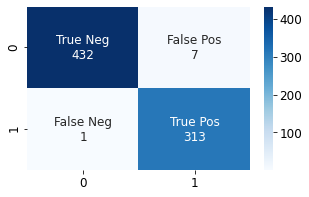

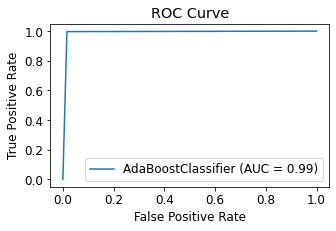

In [94]:
ada2 = AdaBoostClassifier(ada,n_estimators=200, random_state=0,learning_rate=0.5)
ada2.fit(X_train_scaled,y_train)
y_pred_ada = ada2.predict(X_test_scaled)
cm_ab = confusion_matrix(y_test, y_pred_ada)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_ab.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_ab,annot=labels,fmt='',cmap='Blues')
print()

TP_ab = cm_ab[1][1]
FP_ab = cm_ab[0][1]
FN_ab = cm_ab[1][0]
TN_ab = cm_ab[0][0] 

print('TP Rate : ',TP_ab / (TP_ab+FN_ab))
print('TN Rate : ', TN_ab/(FP_ab+TN_ab))
print('FP Rate : ', FP_ab/(FP_ab+TP_ab))
print('FN Rate : ', FN_ab/(FN_ab+TP_ab))
print('Success Rate: ', (TP_ab+TN_ab)/(TP_ab+FP_ab+FN_ab+TN_ab))
print('Misclassifiaction Rate: ', (FP_ab+FN_ab)/(TP_ab+FP_ab+FN_ab+TN_ab))
print(classification_report(y_test, y_pred_ada))

print('Random Forest Test Accuracy : ',accuracy_score(y_test, y_pred_ada)*100,'%')
print('Training Accuracy: ',accuracy_score(y_train, ada2.predict(X_train_scaled))*100,'%')

metrics.plot_roc_curve(ada2, X_test_scaled, y_test) 
plt.title('ROC Curve')
plt.show()

### 7. Logistic Regression

In [117]:
lr_clf = LogisticRegression()

param_grid = {
    'penalty' : ['l1' , 'l2'],
    'C' : [1,10,100,0.1,0.01,0.001]
}
grid_lr_clf = GridSearchCV(estimator=lr_clf,param_grid=param_grid,scoring='accuracy',verbose=1,n_jobs=-1,cv=kfold)
grid_lr_clf.fit(X_train_scaled,y_train)

grid_lr_clf.best_params_

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.5s finished


{'C': 10, 'penalty': 'l2'}


TP Rate :  0.9936305732484076
TN Rate :  0.9840546697038725
FP Rate :  0.0219435736677116
FN Rate :  0.006369426751592357
Success Rate:  0.9880478087649402
Misclassifiaction Rate:  0.01195219123505976
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       439
         1.0       0.98      0.99      0.99       314

    accuracy                           0.99       753
   macro avg       0.99      0.99      0.99       753
weighted avg       0.99      0.99      0.99       753

Logistic Regression Test Accuracy :  98.80478087649402 %
Training Accuracy:  98.37155201063477 %


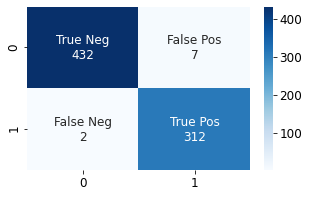

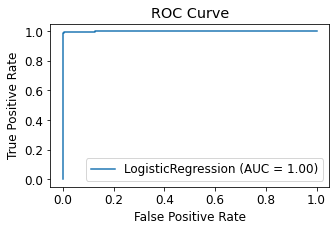

In [87]:
lr_clf2 = LogisticRegression(C = 10 , penalty='l2',random_state=0)
lr_clf2.fit(X_train_scaled,y_train)
y_pred_lr = lr_clf2.predict(X_test_scaled)

cm_lr = confusion_matrix(y_test, y_pred_lr)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_lr.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_lr,annot=labels,fmt='',cmap='Blues')
print()

TP_lr = cm_lr[1][1]
FP_lr = cm_lr[0][1]
FN_lr = cm_lr[1][0]
TN_lr = cm_lr[0][0] 

print('TP Rate : ',TP_lr / (TP_lr+FN_lr))
print('TN Rate : ', TN_lr/(FP_lr+TN_lr))
print('FP Rate : ', FP_lr/(FP_lr+TP_lr))
print('FN Rate : ', FN_lr/(FN_lr+TP_lr))
print('Success Rate: ', (TP_lr+TN_lr)/(TP_lr+FP_lr+FN_lr+TN_lr))
print('Misclassifiaction Rate: ', (FP_lr+FN_lr)/(TP_lr+FP_lr+FN_lr+TN_lr))

print(classification_report(y_test, y_pred_lr))


print('Logistic Regression Test Accuracy : ',accuracy_score(y_test, y_pred_lr)*100,'%')
print('Training Accuracy: ',accuracy_score(y_train, lr_clf2.predict(X_train_scaled))*100,'%')

metrics.plot_roc_curve(lr_clf2, X_test_scaled, y_test) 
plt.title('ROC Curve')
plt.show()

In [57]:
y_pred_prob = lr_clf2.predict_proba(X_test_scaled)[0:10]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Non-Tumor (0)', 'Tumor (1)'])

y_pred_prob_df.head()

,Non-Tumor (0),Tumor (1)
0,9.903087e-01,0.009691
1,5.830780e-11,1.000000
2,6.838989e-06,0.999993
3,1.774136e-13,1.000000
4,9.996613e-01,0.000339


Text(0, 0.5, 'Frequency')

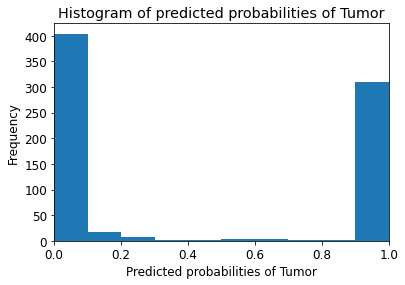

In [59]:
y_pred1 = lr_clf2.predict_proba(X_test_scaled)[:, 1]
plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins = 10)

plt.title('Histogram of predicted probabilities of Tumor')

plt.xlim(0,1)

plt.xlabel('Predicted probabilities of Tumor')
plt.ylabel('Frequency')

## Comparing Different Models

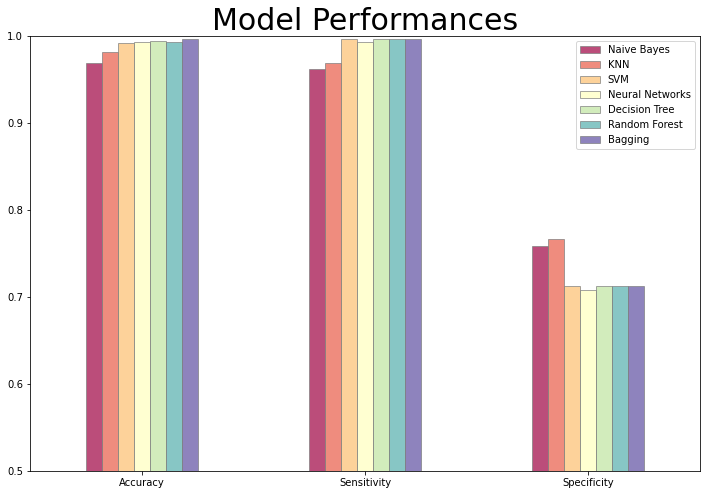

In [52]:
models_metrics = {'Naive Bayes': [0.969, 0.962, 0.758], 
                 'KNN': [0.982, 0.969, 0.766],
                 'SVM' : [0.992,0.997,0.712],
                 'Neural Networks' : [0.993,0.993,0.708],
                  'Decision Tree' : [0.994,0.997,0.712],
                  'Random Forest' : [0.993,0.997,0.712],
                  'Bagging' : [0.997,0.997,0.712]
                }
df_compare = pd.DataFrame(data = models_metrics)
df_compare.rename(index={0:'Accuracy',1:'Sensitivity', 2: 'Specificity'}, 
                 inplace=True)
ax = df_compare.plot(kind='bar', figsize = (12,8), ylim = (0.50, 1), 
        colormap='Spectral',
        rot = 0, 
        edgecolor = 'grey', alpha = 0.7,)

plt.title('Model Performances',fontsize=30,color='black')
plt.show()
